<a href="https://colab.research.google.com/github/kharadevaibhav/Data-Analytics-Tasks/blob/main/Online_Sales_Coupon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data analytics/online_sales_coupon_data.csv')

In [4]:
# Inspect the data
display(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

,Customer_ID,Product_Category,Product_Name,Sale_Amount,Discount_Percentage,Final_Price,Purchase_Date,Year,Month
0,25795,Toys,Lego Set,329.15,10,296.24,2022-10-03 19:53:08.891772640,2022,10
1,10860,Clothing,T-Shirt,85.50,30,59.85,2023-02-12 02:02:57.524007264,2023,2
2,86820,Beauty,Foundation,326.80,20,261.44,2020-10-02 03:30:02.335842200,2020,10
3,64886,Beauty,Face Cream,99.50,10,89.55,2020-10-24 20:15:56.760965480,2020,10
4,16265,Beauty,Foundation,377.76,15,321.10,2021-04-02 17:18:25.320529456,2021,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          7707 non-null   int64  
 1   Product_Category     7707 non-null   object 
 2   Product_Name         7707 non-null   object 
 3   Sale_Amount          7707 non-null   float64
 4   Discount_Percentage  7707 non-null   int64  
 5   Final_Price          7707 non-null   float64
 6   Purchase_Date        7707 non-null   object 
 7   Year                 7707 non-null   int64  
 8   Month                7707 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 542.0+ KB
None
        Customer_ID  Sale_Amount  Discount_Percentage  Final_Price  \
count   7707.000000  7707.000000          7707.000000  7707.000000   
mean   54628.414818   256.163353            21.042559   202.202916   
std    26197.463778   141.824090            12.221452   117.62133

In [5]:
#Sorting Data
df = df.sort_values(by='Sale_Amount', ascending=False)


In [6]:
# Customer engagement rise per product
top_products = df.groupby('Product_Name')['Sale_Amount'].sum().sort_values(ascending=False)
print("Customer engagement by product:")
print(top_products.head())

Customer engagement by product:
Product_Name
Shampoo       74165.65
Sneakers      70189.99
Sweater       69993.88
Jeans         69322.48
Smartphone    68830.68
Name: Sale_Amount, dtype: float64


<ipython-input-7-5c71071887e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index[:10], y=top_products.values[:10], palette='viridis')


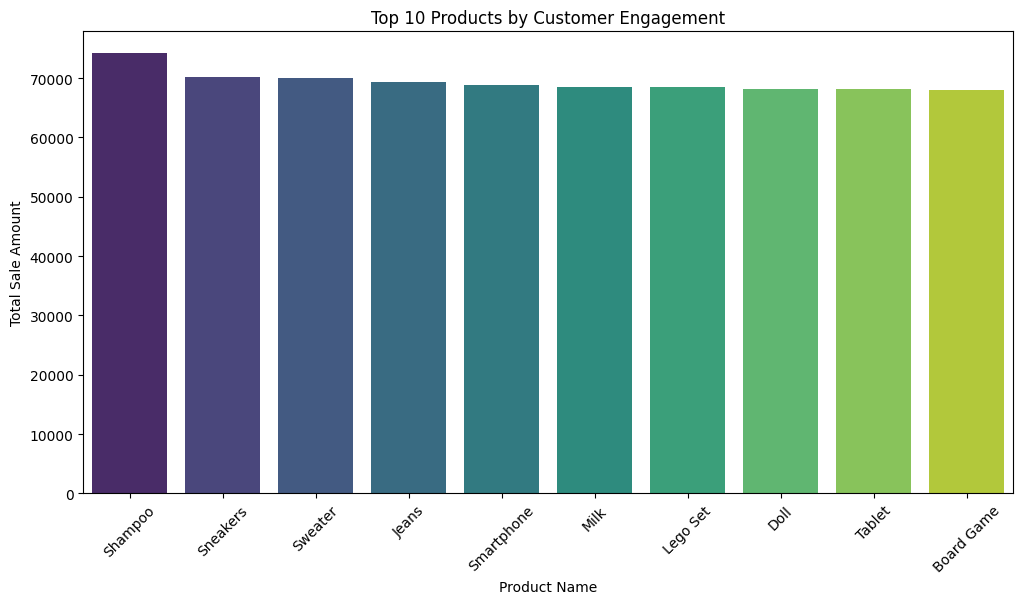

<Figure size 640x480 with 0 Axes>

In [7]:
# Visualization for customer engagement per product
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index[:10], y=top_products.values[:10], palette='viridis')
plt.xlabel("Product Name")
plt.ylabel("Total Sale Amount")
plt.title("Top 10 Products by Customer Engagement")
plt.xticks(rotation=45)
plt.show()
plt.savefig('customers engagement per product.png')

In [8]:
# Product-wise classification of sales
product_sales = df.groupby('Product_Category')['Sale_Amount'].sum().sort_values(ascending=False)
print("Sales per product category:")
print(product_sales)

Sales per product category:
Product_Category
Electronics        336249.07
Beauty             333753.58
Clothing           332890.01
Home Appliances    328662.62
Groceries          321471.74
Toys               321223.94
Name: Sale_Amount, dtype: float64


<ipython-input-9-85d6708a64b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette='coolwarm')


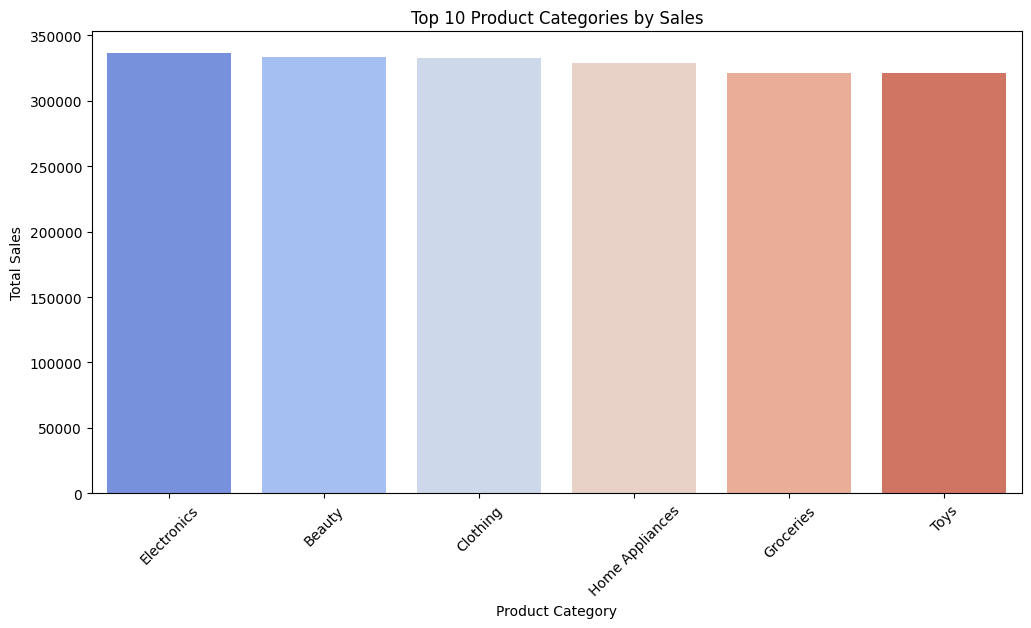

<Figure size 640x480 with 0 Axes>

In [9]:
# Product-wise classification of sales
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette='coolwarm')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top 10 Product Categories by Sales")
plt.xticks(rotation=45)
plt.show()
plt.savefig('product-wise classification of sales Amount.png')

In [15]:
def categorize_coupon(discount):
    if discount == 0:
        return "No Coupon"
    elif 1 <= discount <= 10:
        return "Flat Discount"
    elif 11 <= discount <= 40:
        return "Percentage Based Discount"
    else:
        return "Buy One Get One Free"
df['Coupon Type'] = df['Discount_Percentage'].apply(categorize_coupon)

<Figure size 1200x600 with 0 Axes>

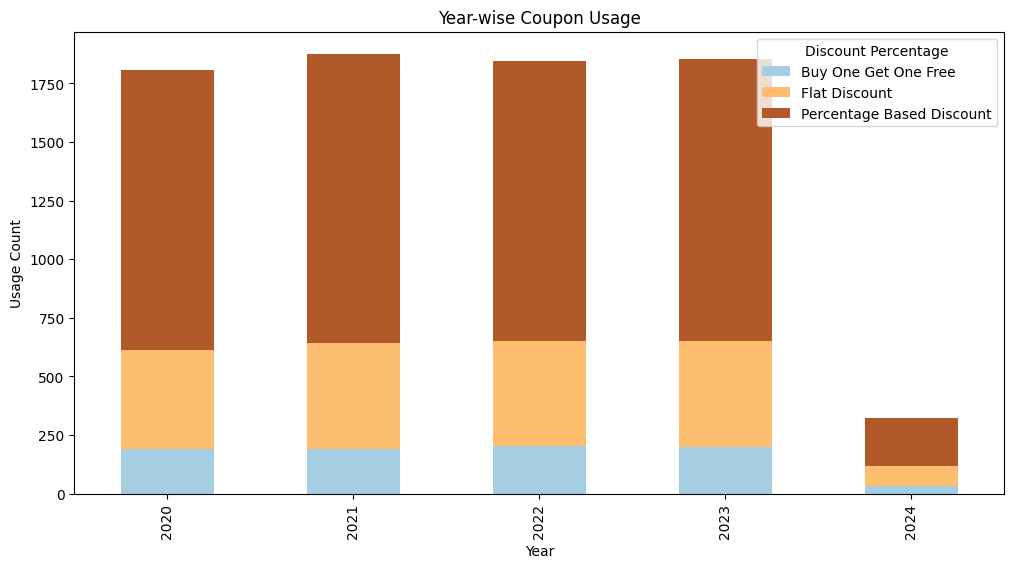

<Figure size 640x480 with 0 Axes>

In [16]:
# Year-wise most used coupons

coupon_usage = df.groupby(['Year', 'Coupon Type']).size().unstack()
plt.figure(figsize=(12, 6))
coupon_usage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.xlabel("Year")
plt.ylabel("Usage Count")
plt.title("Year-wise Coupon Usage")
plt.legend(title="Discount Percentage")
plt.show()
plt.savefig('year-wise most used coupons.png')

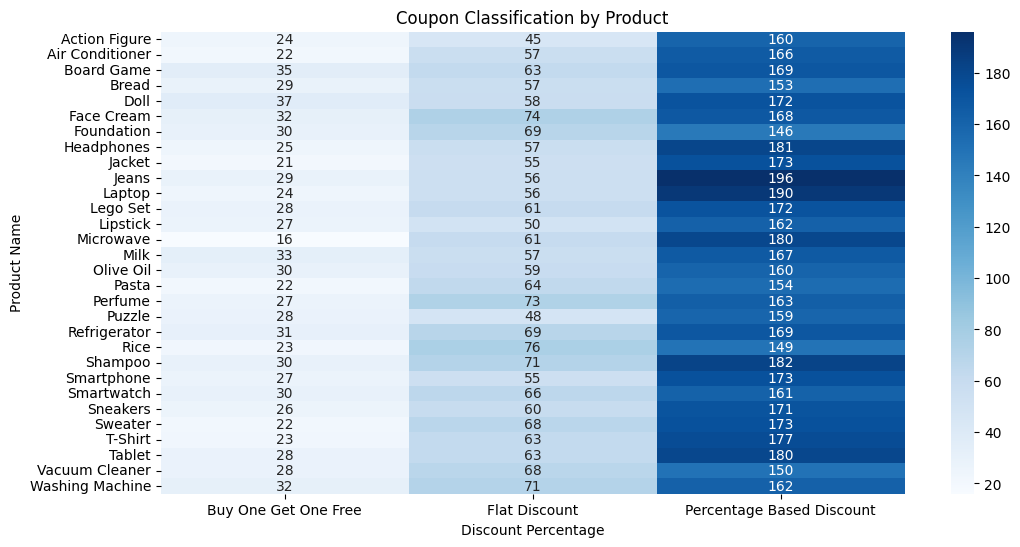

<Figure size 640x480 with 0 Axes>

In [17]:
# Coupon classification by product
coupon_product = df.groupby('Product_Name')['Coupon Type'].value_counts().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(coupon_product, cmap="Blues", annot=True, fmt=".0f")
plt.xlabel("Discount Percentage")
plt.ylabel("Product Name")
plt.title("Coupon Classification by Product")
plt.show()
plt.savefig('Coupon classification by product.png')


<ipython-input-20-050941457c18>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='magma')


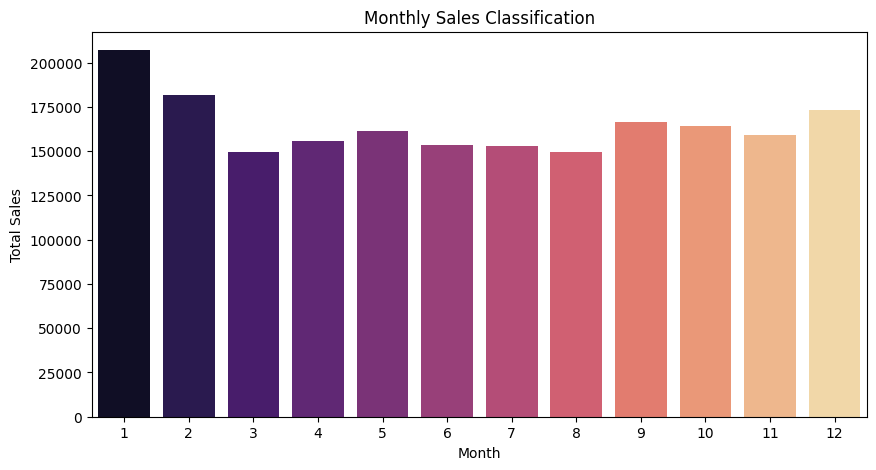

<Figure size 640x480 with 0 Axes>

In [20]:
# Monthly sales classification

monthly_sales = df.groupby('Month')['Sale_Amount'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='magma')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Classification")
plt.show()
plt.savefig('Monthly sales classification.png')